<a href="https://colab.research.google.com/github/ankekat1000/Code_zum_Vortrag_DGPuK-Methoden2018/blob/master/source-code/ChatGPT4omini_finetuning_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install OpenAI

In [ ]:
!pip install openai

## Read Data File for Training

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df_train = pd.read_excel("gdrive/My Drive/train_all_politicians.xlsx")

In [ ]:
df_train

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,beleid,sarkas,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex
0,daniludwigmdb,twitter,1.241286e+18,1.241669e+18,NaN,NaN,NaN,@DaniLudwigMdB @csu_bt @CSU @Markus_Soeder Söd...,Söder ist im Moment der einzige der noch r...,0,0,0,0,0,0,0,0,0,0,female
1,ullinissen,twitter,1.311569e+18,1.311725e+18,NaN,NaN,NaN,@jurgen_muhl @UlliNissen Ja Ähnlichkeit ist se...,Ja Ähnlichkeit ist sehr stark. Haben schon t...,0,0,1,1,0,0,0,0,2,1,female
2,hesommer,twitter,1.440632e+18,1.440737e+18,NaN,NaN,NaN,@ThomasKuhne4 @BerlinerClausi @HESommer @dieli...,Die Forderung nach Mietendeckel kommt nur ...,0,0,0,0,0,0,0,1,1,1,male
3,kleikert,twitter,1.459967e+18,1.460549e+18,NaN,NaN,NaN,@melusia @Jim_Beau_27 @KLeikert Ich habe mir g...,Ich habe mir grade mal Ihre Tweets angescha...,0,1,0,1,0,0,0,0,2,1,female
4,afdprotschka,twitter,1.255090e+18,1.256205e+18,NaN,NaN,NaN,@MarioHielscher @AfDProtschka @rki_de So etwas...,So etwas solltest du bei einem von der #sog...,0,0,0,0,0,0,0,0,0,0,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19739,b_riexinger,twitter,1.404424e+18,1.404468e+18,NaN,NaN,NaN,@OleHeuer @Sebastian_Maas @b_riexinger @CDU Un...,"Und dieses """"""""Naturgesetz"""""""" stützt sich...",0,0,0,0,0,0,0,0,0,0,male
19740,marcobuelow,youtube,NaN,NaN,Ugw-DjlQs9IVhuEaS3V4AaABAg,Gz21yBIkbNQ,UCFIAPLQPIz30M__bslnEfpw,"Aufjeden Fall wähle ich am 26.09 ""Die Partei""!...","Aufjeden Fall wähle ich am 26.09 ""Die Partei""!...",0,0,0,0,0,0,0,0,0,0,male
19741,marcbernhardafd,youtube,NaN,NaN,UgyI7mbTdiICnsTVotZ4AaABAg,nvMnUeGymqY,UCwJ8iSwbS25Xh-uil2la5Eg,Die Grünen brauchen keinen Fortschritt. Die ka...,Die Grünen brauchen keinen Fortschritt. Die ka...,0,0,0,0,0,0,0,1,1,1,male
19742,badulrichmartha,twitter,1.217759e+18,1.217820e+18,NaN,NaN,NaN,@badulrichmartha Sie haben mit Ihrer Ja-Stimme...,Sie haben mit Ihrer Ja-Stimme heute dafür ges...,0,1,0,0,0,1,0,0,2,1,female


In [ ]:
df_train['Incivility_binary_str'] = df_train['Incivility_binary'].replace(
    to_replace=[0],value='civil')
df_train['Incivility_binary_str'] = df_train['Incivility_binary_str'].replace(to_replace=[1],value='uncivil')

In [ ]:
df_train = df_train.sample(n=len(df_train))#shuffle

In [ ]:
df_train.head()

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,sarkas,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str
7192,katrinhelling,twitter,1.450096e+18,1.450132e+18,NaN,NaN,NaN,@KatrinHelling @thomasmayer04 Passt bitte bei ...,Passt bitte bei der Sterbehilfe gut auf. Da ...,0,...,0,0,0,0,0,0,0,0,female,civil
102,irenemihalic,twitter,1.435915e+18,1.435945e+18,NaN,NaN,NaN,@riesen_david @dgkubbe @IreneMihalic @gdp_zoll...,Das scheinen ja die einzigen Qualifikation...,0,...,0,0,0,0,0,0,0,0,female,civil
1057,mastrackzi,youtube,NaN,NaN,UgyP2UdBsRqMW_7l7Jd4AaABAg,eGMYIRTtpws,UCHCdpx6h33QihOsFSjCeWWg,Einfach eine coole Socke,Einfach eine coole Socke,0,...,0,0,0,0,0,0,0,0,female,civil
14773,schneidercar,twitter,1.388199e+18,1.388485e+18,NaN,NaN,NaN,@KirchJurgen @womawo @schneidercar Dafür habe ...,Dafür habe ich Verständnis. Ich korrigiere ...,0,...,0,0,0,0,0,0,0,0,male,civil
2459,lieblingxhain,twitter,1.315573e+18,1.315880e+18,NaN,NaN,NaN,"@LieblingXhain Normalerweise fliegt man raus, ...","Normalerweise fliegt man raus, wenn man seine...",0,...,0,0,0,0,0,0,0,0,female,civil


In [ ]:
df_train.Incivility_binary_str.value_counts()

,count
Incivility_binary_str,
civil,11721
uncivil,8023


## Convert csv File to GPT-readable jsonl data format

In [ ]:
def convert_to_gpt35_format(dataset):
    fine_tuning_data = []
    for _, row in dataset.iterrows():
        json_response = '{"Incivility_binary_str": "' + row['Incivility_binary_str'] + '"}'
        fine_tuning_data.append({
            "messages": [
                {"role": "user", "content": row['text_clean']},
                {"role": "assistant", "content": json_response}
            ]
        })
    return fine_tuning_data

In [ ]:
converted_data= convert_to_gpt35_format(df_train)

In [ ]:
len(converted_data)

19744

In [ ]:
converted_data[0]

{'messages': [{'role': 'user',
   'content': '  Passt bitte bei der Sterbehilfe gut auf. Da kann viel schiefgehen.'},
  {'role': 'assistant', 'content': '{"Incivility_binary_str": "civil"}'}]}

In [ ]:
print("First example:")
for message in converted_data[0]["messages"]:
    print(message)

First example:
{'role': 'user', 'content': '  Passt bitte bei der Sterbehilfe gut auf. Da kann viel schiefgehen.'}
{'role': 'assistant', 'content': '{"Incivility_binary_str": "civil"}'}


In [ ]:
import json

In [ ]:
def write_to_jsonl(data, file_path):
    with open(file_path, 'w') as file:
        for entry in data:
            json.dump(entry, file)
            file.write('\n')

training_file_name = "train_few.jsonl"
#validation_file_name = "val.jsonl"

write_to_jsonl(converted_data, training_file_name)
#write_to_jsonl(val_data, validation_file_name)

In [ ]:
data_path = "train_few.jsonl"

# Load the dataset
with open(data_path, 'r', encoding='utf-8') as f:
    dataset = [json.loads(line) for line in f]

# Initial dataset stats
#print("Num examples:", len(dataset))
print("First example:")
for message in dataset[0]["messages"]:
    print(message)

First example:
{'role': 'user', 'content': '  Passt bitte bei der Sterbehilfe gut auf. Da kann viel schiefgehen.'}
{'role': 'assistant', 'content': '{"Incivility_binary_str": "civil"}'}


In [ ]:
json.loads(converted_data[0]["messages"][-1]["content"])

{'Incivility_binary_str': 'civil'}

## Training Setup

https://www.datacamp.com/tutorial/fine-tuning-gpt-4o-mini

In [ ]:
#!pip install openai

In [ ]:
from openai import OpenAI
client = OpenAI(api_key="xxx") #You need a key from OpenAI

In [ ]:
train_file = client.files.create(
  file=open(training_file_name, "rb"),
  purpose="fine-tune"
)

In [ ]:
model = client.fine_tuning.jobs.create(
  training_file=train_file.id,
  #validation_file=valid_file.id,
  model="gpt-4o-mini-2024-07-18",
  hyperparameters={
    "n_epochs": 3,
	"batch_size": 3,
	"learning_rate_multiplier": 0.3
  }
)
job_id = model.id
status = model.status

print(f'Fine-tuning model with jobID: {job_id}.')
print(f"Training Response: {model}")
print(f"Training Status: {status}")

Fine-tuning model with jobID: ftjob-oekdjn1dXnHVIIGkmMrOd0nj.
Training Response: FineTuningJob(id='ftjob-oekdjn1dXnHVIIGkmMrOd0nj', created_at=1737654998, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(batch_size=3, learning_rate_multiplier=0.3, n_epochs=3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-1U4it6USVmjBNY4fx7nBj4JC', result_files=[], seed=6876678, status='validating_files', trained_tokens=None, training_file='file-7GBTqysb9ojFiJSRZxfPMq', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=3, learning_rate_multiplier=0.3, n_epochs=3)), type='supervised'), user_provided_suffix=None)
Training Status: validating_files


In [ ]:
# Retrieve the state of a fine-tune
client.fine_tuning.jobs.retrieve("ftjob-oekdjn1dXnHVIIGkmMrOd0nj")

FineTuningJob(id='ftjob-oekdjn1dXnHVIIGkmMrOd0nj', created_at=1737654998, error=Error(code=None, message=None, param=None), fine_tuned_model='ft:gpt-4o-mini-2024-07-18:ilmenau-university-of-technology::At0fH2nI', finished_at=1737673957, hyperparameters=Hyperparameters(batch_size=3, learning_rate_multiplier=0.3, n_epochs=3), model='gpt-4o-mini-2024-07-18', object='fine_tuning.job', organization_id='org-1U4it6USVmjBNY4fx7nBj4JC', result_files=['file-UUpvKqcv4F3txKhd1tt7rQ'], seed=6876678, status='succeeded', trained_tokens=3433899, training_file='file-7GBTqysb9ojFiJSRZxfPMq', validation_file=None, estimated_finish=None, integrations=[], method=Method(dpo=None, supervised=MethodSupervised(hyperparameters=MethodSupervisedHyperparameters(batch_size=3, learning_rate_multiplier=0.3, n_epochs=3)), type='supervised'), user_provided_suffix=None)

In [ ]:
# Cancel a job
#client.fine_tuning.jobs.cancel(job_id)

In [ ]:
result = client.fine_tuning.jobs.list() #Get name of the latest model in your list

# Retrieve the fine tuned model
fine_tuned_model = result.data[0].fine_tuned_model
print(fine_tuned_model)

ft:gpt-4o-mini-2024-07-18:ilmenau-university-of-technology::At0fH2nI


## Apply fine-tunded model on Test Set

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#import pandas as pd
df_test = pd.read_excel("gdrive/My Drive/test_all_politicians.xlsx")

In [ ]:
df_test['Incivility_binary_str'] = df_test['Incivility_binary'].replace(to_replace=[0],value='civil')

In [ ]:
df_test['Incivility_binary_str'] = df_test['Incivility_binary_str'].replace(to_replace=[1],value='uncivil')

In [ ]:
df_test.head()

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,sarkas,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str
0,afdprotschka,twitter,1.379927e+18,1.380152e+18,NaN,NaN,NaN,"@AfDProtschka Wie meinen Sie das, dass sich Ge...","Wie meinen Sie das, dass sich Geschichte wied...",0,...,0,0,0,0,0,0,0,0,male,civil
1,nicolegohlke,twitter,1.269922e+18,1.269990e+18,NaN,NaN,NaN,"@NicoleGohlke @Linksfraktion Das ist richtig, ...","Das ist richtig, wenn ich aber in der Wirtsc...",0,...,0,0,0,0,0,0,0,0,female,civil
2,oezoguz,twitter,1.348569e+18,1.348725e+18,NaN,NaN,NaN,@oezoguz Rassisten halten halt zu Rassisten.,Rassisten halten halt zu Rassisten.,0,...,0,0,0,0,0,1,1,1,female,uncivil
3,m_harderkuehnel,youtube,NaN,NaN,UgwnRD-0qPSUTdEqDsp4AaABAg,bSAEIMiFLbw,UCjCoWwZ-kIN23Znlg98SRYg,Stimme absolut zu! Die Kriminalstatistik bewei...,Stimme absolut zu! Die Kriminalstatistik bewei...,0,...,0,0,0,0,0,0,1,1,female,uncivil
4,corinnamiazga,youtube,NaN,NaN,UgwvOSQCml0z2Ac0lsN4AaABAg,J9WdrHpX1hs,UCsLN1bEfDJoZOs8udTwHatQ,Die Bundeswehr ist eine Söldnerarmee unter der...,Die Bundeswehr ist eine Söldnerarmee unter der...,0,...,0,1,0,0,0,1,3,1,female,uncivil


#### Make predictions with fine-tunded model on test set

In [ ]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def format_test(row):
    formatted_message = [{"role": "user", "content": row['text_clean']}]
    return formatted_message

def predict(test_messages, fine_tuned_model_id):
    response = client.chat.completions.create(
        model=fine_tuned_model_id, messages=test_messages, temperature=0, max_tokens=50
    )
    return response.choices[0].message.content

In [ ]:
def store_predictions(test_df, fine_tuned_model_id):
    test_df['Prediction_GPT4omini'] = None
    for index, row in test_df.iterrows():
        test_message = format_test(row)
        prediction_result = predict(test_message, fine_tuned_model_id)
        test_df.at[index, 'Prediction_GPT4omini'] = prediction_result

    test_df.to_csv("gdrive/My Drive/predictions.csv")

In [ ]:
df_test

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,sarkas,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str
0,afdprotschka,twitter,1.379927e+18,1.380152e+18,NaN,NaN,NaN,"@AfDProtschka Wie meinen Sie das, dass sich Ge...","Wie meinen Sie das, dass sich Geschichte wied...",0,...,0,0,0,0,0,0,0,0,male,civil
1,nicolegohlke,twitter,1.269922e+18,1.269990e+18,NaN,NaN,NaN,"@NicoleGohlke @Linksfraktion Das ist richtig, ...","Das ist richtig, wenn ich aber in der Wirtsc...",0,...,0,0,0,0,0,0,0,0,female,civil
2,oezoguz,twitter,1.348569e+18,1.348725e+18,NaN,NaN,NaN,@oezoguz Rassisten halten halt zu Rassisten.,Rassisten halten halt zu Rassisten.,0,...,0,0,0,0,0,1,1,1,female,uncivil
3,m_harderkuehnel,youtube,NaN,NaN,UgwnRD-0qPSUTdEqDsp4AaABAg,bSAEIMiFLbw,UCjCoWwZ-kIN23Znlg98SRYg,Stimme absolut zu! Die Kriminalstatistik bewei...,Stimme absolut zu! Die Kriminalstatistik bewei...,0,...,0,0,0,0,0,0,1,1,female,uncivil
4,corinnamiazga,youtube,NaN,NaN,UgwvOSQCml0z2Ac0lsN4AaABAg,J9WdrHpX1hs,UCsLN1bEfDJoZOs8udTwHatQ,Die Bundeswehr ist eine Söldnerarmee unter der...,Die Bundeswehr ist eine Söldnerarmee unter der...,0,...,0,1,0,0,0,1,3,1,female,uncivil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,swagenknecht,youtube,NaN,NaN,UgwHVgC2h_27FYQweYF4AaABAg,rIlUci-PJVA,UCPH3ZPeqWqRVZ_ef4vOZgSw,"Wer grün wählt, hasst Deutschland","Wer grün wählt, hasst Deutschland",0,...,0,0,0,0,0,1,1,1,female,uncivil
4933,ullmannmdb,twitter,1.223174e+18,1.223321e+18,NaN,NaN,NaN,@UllmannMdB @Anka54973800 Und daher: doch so d...,Und daher: doch so darf und muss gerechnet w...,0,...,0,0,0,0,0,0,0,0,male,civil
4934,bmisprecher,twitter,1.270705e+18,1.270790e+18,NaN,NaN,NaN,"@TAeterna @BMISprecher Das Problem ist, dass s...","Das Problem ist, dass sie gelernt haben, das...",0,...,0,0,0,0,0,0,0,0,male,civil
4935,alice_weidel,twitter,1.349765e+18,1.350399e+18,NaN,NaN,NaN,@DegisD @Alice_Weidel Das hat bei denen doch M...,Das hat bei denen doch Methode. Gehört zum P...,0,...,0,0,0,0,0,0,0,0,female,civil


In [ ]:
#Will take some time
store_predictions(df_test, fine_tuned_model)

In [ ]:
df_test.head()

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str,Prediction_GPT4omini
0,afdprotschka,twitter,1.379927e+18,1.380152e+18,NaN,NaN,NaN,"@AfDProtschka Wie meinen Sie das, dass sich Ge...","Wie meinen Sie das, dass sich Geschichte wied...",0,...,0,0,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}"
1,nicolegohlke,twitter,1.269922e+18,1.269990e+18,NaN,NaN,NaN,"@NicoleGohlke @Linksfraktion Das ist richtig, ...","Das ist richtig, wenn ich aber in der Wirtsc...",0,...,0,0,0,0,0,0,0,female,civil,"{""Incivility_binary_str"": ""civil""}"
2,oezoguz,twitter,1.348569e+18,1.348725e+18,NaN,NaN,NaN,@oezoguz Rassisten halten halt zu Rassisten.,Rassisten halten halt zu Rassisten.,0,...,0,0,0,0,1,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"
3,m_harderkuehnel,youtube,NaN,NaN,UgwnRD-0qPSUTdEqDsp4AaABAg,bSAEIMiFLbw,UCjCoWwZ-kIN23Znlg98SRYg,Stimme absolut zu! Die Kriminalstatistik bewei...,Stimme absolut zu! Die Kriminalstatistik bewei...,0,...,0,0,0,0,0,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"
4,corinnamiazga,youtube,NaN,NaN,UgwvOSQCml0z2Ac0lsN4AaABAg,J9WdrHpX1hs,UCsLN1bEfDJoZOs8udTwHatQ,Die Bundeswehr ist eine Söldnerarmee unter der...,Die Bundeswehr ist eine Söldnerarmee unter der...,0,...,1,0,0,0,1,3,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"


In [ ]:
df_test.Prediction_GPT4omini.value_counts()

,count
Prediction_GPT4omini,
"{""Incivility_binary_str"": ""civil""}",2806
"{""Incivility_binary_str"": ""uncivil""}",2131


## Evaluate model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df_test = pd.read_csv("gdrive/My Drive/predictions.csv", index_col=0)
df_test.head()

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,stereo,diskri,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str,Prediction_GPT4omini
0,afdprotschka,twitter,1.379927e+18,1.380152e+18,NaN,NaN,NaN,"@AfDProtschka Wie meinen Sie das, dass sich Ge...","Wie meinen Sie das, dass sich Geschichte wied...",0,...,0,0,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}"
1,nicolegohlke,twitter,1.269922e+18,1.269990e+18,NaN,NaN,NaN,"@NicoleGohlke @Linksfraktion Das ist richtig, ...","Das ist richtig, wenn ich aber in der Wirtsc...",0,...,0,0,0,0,0,0,0,female,civil,"{""Incivility_binary_str"": ""civil""}"
2,oezoguz,twitter,1.348569e+18,1.348725e+18,NaN,NaN,NaN,@oezoguz Rassisten halten halt zu Rassisten.,Rassisten halten halt zu Rassisten.,0,...,0,0,0,0,1,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"
3,m_harderkuehnel,youtube,NaN,NaN,UgwnRD-0qPSUTdEqDsp4AaABAg,bSAEIMiFLbw,UCjCoWwZ-kIN23Znlg98SRYg,Stimme absolut zu! Die Kriminalstatistik bewei...,Stimme absolut zu! Die Kriminalstatistik bewei...,0,...,0,0,0,0,0,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"
4,corinnamiazga,youtube,NaN,NaN,UgwvOSQCml0z2Ac0lsN4AaABAg,J9WdrHpX1hs,UCsLN1bEfDJoZOs8udTwHatQ,Die Bundeswehr ist eine Söldnerarmee unter der...,Die Bundeswehr ist eine Söldnerarmee unter der...,0,...,1,0,0,0,1,3,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}"


In [ ]:
df_test['Prediction_values'] = df_test['Prediction_GPT4omini'].replace(
    to_replace=['{"Incivility_binary_str": "civil"}'],value=0)

In [ ]:
df_test['Prediction_values'] = df_test['Prediction_values'].replace(
    to_replace=['{"Incivility_binary_str": "uncivil"}'],value=1)

<ipython-input-4-2513e34579cf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Prediction_values'] = df_test['Prediction_values'].replace(


In [ ]:
df_test.Prediction_values.value_counts()

,count
Prediction_values,
0,2806
1,2131


In [ ]:
df_test['Prediction_str'] = df_test['Prediction_values'].replace(
    to_replace=[1],value="uncivil")

df_test['Prediction_str'] = df_test['Prediction_str'].replace(
    to_replace=[0],value="civil")

In [ ]:
df_test.Prediction_str.value_counts()

,count
Prediction_str,
civil,2806
uncivil,2131


#### Results on whole test set

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
print(classification_report(df_test.Incivility_binary_str, df_test.Prediction_str))

              precision    recall  f1-score   support

       civil       0.86      0.84      0.85      2854
     uncivil       0.79      0.81      0.80      2083

    accuracy                           0.83      4937
   macro avg       0.82      0.83      0.83      4937
weighted avg       0.83      0.83      0.83      4937



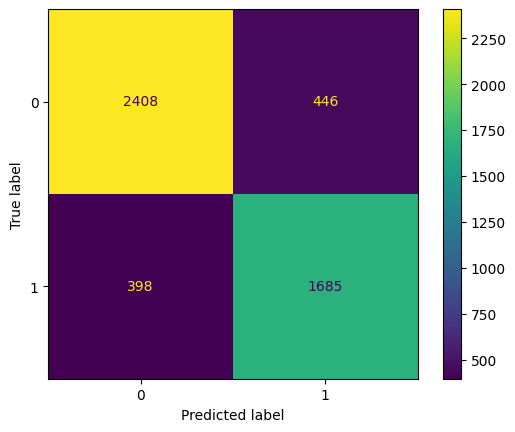

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(df_test.Incivility_binary, df_test.Prediction_values)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Female Test Data

In [ ]:
test_female = df_test[df_test['Sex'] == 'female']

In [ ]:
test_female

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str,Prediction_GPT4omini,Prediction_values,Prediction_str
1,nicolegohlke,twitter,1.269922e+18,1.269990e+18,NaN,NaN,NaN,"@NicoleGohlke @Linksfraktion Das ist richtig, ...","Das ist richtig, wenn ich aber in der Wirtsc...",0,...,0,0,0,0,0,female,civil,"{""Incivility_binary_str"": ""civil""}",0,civil
2,oezoguz,twitter,1.348569e+18,1.348725e+18,NaN,NaN,NaN,@oezoguz Rassisten halten halt zu Rassisten.,Rassisten halten halt zu Rassisten.,0,...,0,0,1,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
3,m_harderkuehnel,youtube,NaN,NaN,UgwnRD-0qPSUTdEqDsp4AaABAg,bSAEIMiFLbw,UCjCoWwZ-kIN23Znlg98SRYg,Stimme absolut zu! Die Kriminalstatistik bewei...,Stimme absolut zu! Die Kriminalstatistik bewei...,0,...,0,0,0,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
4,corinnamiazga,youtube,NaN,NaN,UgwvOSQCml0z2Ac0lsN4AaABAg,J9WdrHpX1hs,UCsLN1bEfDJoZOs8udTwHatQ,Die Bundeswehr ist eine Söldnerarmee unter der...,Die Bundeswehr ist eine Söldnerarmee unter der...,0,...,0,0,1,3,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
5,ulrikedemmer,twitter,1.314580e+18,1.314582e+18,NaN,NaN,NaN,@UlrikeDemmer So lange Frau Dr. Merkel diesen ...,So lange Frau Dr. Merkel diesen Posten besetz...,0,...,0,0,1,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,swagenknecht,youtube,NaN,NaN,UgzG-6gCf_YqDX2n_e94AaABAg,wDXe-3FYhmA,UCPH3ZPeqWqRVZ_ef4vOZgSw,"Brinkhaus ist so arrogant, weil er Sahra nicht...","Brinkhaus ist so arrogant, weil er Sahra nicht...",0,...,0,0,1,3,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
4930,corinnamiazga,twitter,1.316254e+18,1.316329e+18,NaN,NaN,NaN,@CorinnaMiazga Die #noafd tobt durch die asozi...,Die #noafd tobt durch die asozialen Medien un...,0,...,0,0,1,2,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
4931,saskialudwigcdu,twitter,1.382254e+18,1.382446e+18,NaN,NaN,NaN,@PNemschak @SaskiaLudwigCDU @AlexE1789 Was hei...,Was heißt denn vorzeitig Nemschak?,0,...,0,0,0,0,0,female,civil,"{""Incivility_binary_str"": ""civil""}",0,civil
4932,swagenknecht,youtube,NaN,NaN,UgwHVgC2h_27FYQweYF4AaABAg,rIlUci-PJVA,UCPH3ZPeqWqRVZ_ef4vOZgSw,"Wer grün wählt, hasst Deutschland","Wer grün wählt, hasst Deutschland",0,...,0,0,1,1,1,female,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil


In [ ]:
print(classification_report(test_female.Incivility_binary_str, test_female.Prediction_str))

              precision    recall  f1-score   support

       civil       0.85      0.85      0.85      1589
     uncivil       0.81      0.80      0.81      1249

    accuracy                           0.83      2838
   macro avg       0.83      0.83      0.83      2838
weighted avg       0.83      0.83      0.83      2838



#### Male subsample

In [ ]:
test_male = df_test[df_test['Sex'] == 'male']

In [ ]:
test_male

,politician_account,platform,conversation_id,tweet_id,comment_id,video_id,channel_id,text,text_clean,vulgar,...,gewalt,luegen,gering,Incivility_sum,Incivility_binary,Sex,Incivility_binary_str,Prediction_GPT4omini,Prediction_values,Prediction_str
0,afdprotschka,twitter,1.379927e+18,1.380152e+18,NaN,NaN,NaN,"@AfDProtschka Wie meinen Sie das, dass sich Ge...","Wie meinen Sie das, dass sich Geschichte wied...",0,...,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}",0,civil
6,torstenherbst,twitter,1.238588e+18,1.238784e+18,NaN,NaN,NaN,@MarcoFindeisen @torstenherbst @ARDde Wissen S...,"Wissen Sie, das stört mich mittlerweile an ...",0,...,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}",0,civil
7,florian_toncar,twitter,1.426240e+18,1.426654e+18,NaN,NaN,NaN,@florian_toncar Bullshit. Im Strafrecht nehmen...,Bullshit. Im Strafrecht nehmen Sie auch nicht...,0,...,0,1,0,1,1,male,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
8,paulziemiak,twitter,1.214526e+18,1.214562e+18,NaN,NaN,NaN,@PaulZiemiak @sebastiankurz Ja das ist das ers...,"Ja das ist das erstemal, wo ich ihnen recht ...",0,...,0,0,1,2,1,male,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
9,juergenbraunafd,twitter,1.420380e+18,1.421016e+18,NaN,NaN,NaN,@johann72f @Feldzug2 Mein Freund das ist keine...,Mein Freund das ist keine neue Antwort sonde...,0,...,0,0,1,2,1,male,uncivil,"{""Incivility_binary_str"": ""civil""}",0,civil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4927,oliver_krischer,twitter,1.414917e+18,1.415090e+18,NaN,NaN,NaN,@Oliver_Krischer @morgenmagazin Das Tempolimit...,Das Tempolimits den Co2 Ausstoß regulieren i...,0,...,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
4929,bmisprecher,twitter,1.247569e+18,1.247805e+18,NaN,NaN,NaN,@BMISprecher Toll. 50. Schämt Ihr Euch eigentl...,Toll. 50. Schämt Ihr Euch eigentlich nicht? I...,0,...,0,0,0,1,1,male,uncivil,"{""Incivility_binary_str"": ""uncivil""}",1,uncivil
4933,ullmannmdb,twitter,1.223174e+18,1.223321e+18,NaN,NaN,NaN,@UllmannMdB @Anka54973800 Und daher: doch so d...,Und daher: doch so darf und muss gerechnet w...,0,...,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}",0,civil
4934,bmisprecher,twitter,1.270705e+18,1.270790e+18,NaN,NaN,NaN,"@TAeterna @BMISprecher Das Problem ist, dass s...","Das Problem ist, dass sie gelernt haben, das...",0,...,0,0,0,0,0,male,civil,"{""Incivility_binary_str"": ""civil""}",0,civil


In [ ]:
print(classification_report(test_male.Incivility_binary_str, test_male.Prediction_str))

              precision    recall  f1-score   support

       civil       0.88      0.83      0.85      1265
     uncivil       0.76      0.82      0.79       834

    accuracy                           0.83      2099
   macro avg       0.82      0.83      0.82      2099
weighted avg       0.83      0.83      0.83      2099



## Subcategories

#### Lying Accusations

In [ ]:
print(classification_report(df_test.gewalt, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      4904
           1       0.01      0.67      0.02        33

    accuracy                           0.57      4937
   macro avg       0.50      0.62      0.37      4937
weighted avg       0.99      0.57      0.72      4937



In [ ]:
print(classification_report(test_female.gewalt, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.57      0.72      2823
           1       0.01      0.67      0.02        15

    accuracy                           0.57      2838
   macro avg       0.50      0.62      0.37      2838
weighted avg       0.99      0.57      0.72      2838



In [ ]:
print(classification_report(test_male.gewalt, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2081
           1       0.01      0.67      0.03        18

    accuracy                           0.58      2099
   macro avg       0.50      0.62      0.38      2099
weighted avg       0.99      0.58      0.72      2099



#### Vulgarity

In [ ]:
print(classification_report(df_test.vulgar, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      4849
           1       0.04      0.99      0.08        88

    accuracy                           0.59      4937
   macro avg       0.52      0.78      0.41      4937
weighted avg       0.98      0.59      0.72      4937



In [ ]:
print(classification_report(test_female.vulgar, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73      2788
           1       0.04      0.98      0.08        50

    accuracy                           0.58      2838
   macro avg       0.52      0.78      0.40      2838
weighted avg       0.98      0.58      0.72      2838



In [ ]:
print(classification_report(test_male.vulgar, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74      2061
           1       0.04      1.00      0.08        38

    accuracy                           0.59      2099
   macro avg       0.52      0.79      0.41      2099
weighted avg       0.98      0.59      0.73      2099



#### Discrimination

In [ ]:
print(classification_report(df_test.diskri, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.57      0.73      4855
           1       0.03      0.67      0.05        82

    accuracy                           0.57      4937
   macro avg       0.51      0.62      0.39      4937
weighted avg       0.97      0.57      0.71      4937



In [ ]:
print(classification_report(test_female.diskri, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72      2789
           1       0.03      0.73      0.06        49

    accuracy                           0.57      2838
   macro avg       0.51      0.65      0.39      2838
weighted avg       0.98      0.57      0.71      2838



In [ ]:
print(classification_report(test_male.diskri, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      2066
           1       0.02      0.58      0.04        33

    accuracy                           0.58      2099
   macro avg       0.50      0.58      0.38      2099
weighted avg       0.97      0.58      0.72      2099



#### Lying Accusations

In [ ]:
print(classification_report(df_test.luegen, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      4704
           1       0.10      0.90      0.18       233

    accuracy                           0.61      4937
   macro avg       0.55      0.75      0.46      4937
weighted avg       0.95      0.61      0.71      4937



In [ ]:
print(classification_report(test_female.luegen, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2695
           1       0.11      0.93      0.19       143

    accuracy                           0.61      2838
   macro avg       0.55      0.76      0.47      2838
weighted avg       0.95      0.61      0.71      2838



In [ ]:
print(classification_report(test_male.luegen, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2009
           1       0.09      0.86      0.16        90

    accuracy                           0.60      2099
   macro avg       0.54      0.72      0.45      2099
weighted avg       0.95      0.60      0.72      2099



#### Stereotyping

In [ ]:
print(classification_report(df_test.stereo, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      4729
           1       0.08      0.83      0.15       208

    accuracy                           0.60      4937
   macro avg       0.53      0.71      0.44      4937
weighted avg       0.95      0.60      0.71      4937



In [ ]:
print(classification_report(test_female.stereo, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.98      0.59      0.74      2646
           1       0.13      0.83      0.22       192

    accuracy                           0.61      2838
   macro avg       0.55      0.71      0.48      2838
weighted avg       0.92      0.61      0.70      2838



In [ ]:
print(classification_report(test_male.stereo, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73      2083
           1       0.01      0.81      0.03        16

    accuracy                           0.58      2099
   macro avg       0.51      0.69      0.38      2099
weighted avg       0.99      0.58      0.73      2099



#### Sarcasm

In [ ]:
print(classification_report(df_test.sarkas, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.95      0.61      0.75      4352
           1       0.21      0.77      0.33       585

    accuracy                           0.63      4937
   macro avg       0.58      0.69      0.54      4937
weighted avg       0.86      0.63      0.70      4937



In [ ]:
print(classification_report(test_female.sarkas, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      2499
           1       0.21      0.75      0.32       339

    accuracy                           0.62      2838
   macro avg       0.58      0.68      0.53      2838
weighted avg       0.86      0.62      0.69      2838



In [ ]:
print(classification_report(test_male.sarkas, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75      1853
           1       0.22      0.79      0.34       246

    accuracy                           0.64      2099
   macro avg       0.59      0.71      0.55      2099
weighted avg       0.87      0.64      0.71      2099



#### Insult

In [ ]:
print(classification_report(df_test.beleid, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79      4101
           1       0.36      0.93      0.52       836

    accuracy                           0.71      4937
   macro avg       0.67      0.80      0.66      4937
weighted avg       0.87      0.71      0.75      4937



In [ ]:
print(classification_report(test_female.beleid, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80      2291
           1       0.41      0.92      0.56       547

    accuracy                           0.73      2838
   macro avg       0.69      0.80      0.68      2838
weighted avg       0.86      0.73      0.75      2838



In [ ]:
print(classification_report(test_male.beleid, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79      1810
           1       0.30      0.94      0.46       289

    accuracy                           0.69      2099
   macro avg       0.64      0.80      0.62      2099
weighted avg       0.89      0.69      0.74      2099



#### Disregard

In [ ]:
print(classification_report(df_test.gering, df_test.Prediction_values))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      3837
           1       0.40      0.78      0.53      1100

    accuracy                           0.69      4937
   macro avg       0.66      0.72      0.65      4937
weighted avg       0.80      0.69      0.72      4937



In [ ]:
print(classification_report(test_female.gering, test_female.Prediction_values))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      2217
           1       0.38      0.75      0.50       621

    accuracy                           0.67      2838
   macro avg       0.64      0.70      0.63      2838
weighted avg       0.79      0.67      0.70      2838



In [ ]:
print(classification_report(test_male.gering, test_male.Prediction_values))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1620
           1       0.44      0.82      0.57       479

    accuracy                           0.72      2099
   macro avg       0.68      0.75      0.68      2099
weighted avg       0.82      0.72      0.74      2099



### False Negatives

In [ ]:
#False negatives
df_fn = df_test[["text_clean",
 'stereo',
 'diskri',
  "Prediction_values", "Incivility_binary"]][df_test["Incivility_binary"] > df_test["Prediction_values"]]
df_fn

,text_clean,stereo,diskri,Prediction_values,Incivility_binary
9,Mein Freund das ist keine neue Antwort sonde...,0,0,0,1
23,Da haben Sie völlig Recht - das war wirklich...,0,0,0,1
27,Salzig steht Ihnen nicht.,0,0,0,1
48,Ein wirklich tolles und ehrliches Video♥️💙♥️💙♥...,1,0,0,1
58,"Abgefahren, lange nichts von ihr gehört. Dann ...",0,0,0,1
...,...,...,...,...,...
4834,"Zumal es etwas untertrieben scheint, von """"...",0,0,0,1
4874,Das war eine supertolle Rede liebe Afd . Ich m...,0,0,0,1
4900,#dieseFeinenLeute Demokratie braucht Demokrat...,0,0,0,1
4901,"Liebe Frau Wagenknecht,\nzum Einen möchte ich ...",1,0,0,1


In [ ]:
df_fn_fin = pd.concat([df_fn.loc[df_fn['diskri'] == 1], df_fn.loc[df_fn['stereo'] == 1]], ignore_index=True, sort=False)

In [ ]:
df_fn_fin

,text_clean,stereo,diskri,Prediction_values,Incivility_binary
0,Hätte man 2015 die Grenzen dicht gemacht und n...,0,1,0,1
1,Und was ist mit den anderen 72 Geschlechtern...,0,1,0,1
2,"Oh, da isse wieder! Mit natürlicher Haarfarbe,...",1,1,0,1
3,Die Saat der Grün Schwarzen Gendersternchen P...,0,1,0,1
4,Nein! Einfach nein!! In der schule hat eine ...,0,1,0,1
...,...,...,...,...,...
58,"Die AfD hat nicht nur die schönsten Frauen,sie...",1,0,0,1
59,"Sehr geschätzte Frau Mihalic, das neue Bundesl...",1,0,0,1
60,So richtig glücklich sie die Dame links im...,1,0,0,1
61,"Alles schön und gut, aber die H2-Tankstellen s...",1,0,0,1


In [ ]:
df_fn_fin.to_excel("gdrive/My Drive/GPT4_finetuned_all_politicians_fn.xlsx", index=None)